In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns
import os

folder = '../data/processed'
filename = 'dataset_final.csv'
file_path = os.path.join(folder, filename)

try:
    df = pd.read_csv(
        file_path,
        sep=',',
        decimal='.'
    )
    df = df.drop(columns=['DIA'])
    print(f"✅ DataFrame cargado exitosamente desde: {file_path}")
    print(f"Dimensiones: {df.shape}")
    print("\nPrimeras 5 filas:")
    print(df.head())

except FileNotFoundError:
    print(f"❌ Error: No se encontró el archivo en la ruta: {file_path}")
except Exception as e:
    print(f"❌ Error al leer el archivo: {e}")

✅ DataFrame cargado exitosamente desde: ../data/processed\dataset_final.csv
Dimensiones: (1184, 105)

Primeras 5 filas:
   Frio (Kw)  Hl de Mosto  Sala Maq (Kw)  Servicios (Kw)  KW Gral Planta  \
0    23954.0          0.0        17080.0         23848.0         59058.0   
1    28268.0       2907.0        27216.0         38033.0        131184.0   
2    24246.0       4829.0        31386.0         42565.5        136078.0   
3    29885.0       7828.0        28070.0         39650.0        139714.0   
4    24449.0       6406.0        33463.0         45385.0        146862.0   

   Planta (Kw)  Agua Planta (Hl)  Planta de agua (Hl)  KW Trafo 10  \
0     27637.27           10280.0             11241.40      6046.25   
1     54409.81           13970.0             22107.77     10108.13   
2     65685.59           36300.0             46955.43      9177.75   
3     67098.54           40120.0             51124.18      6717.25   
4     70600.64           38940.0             49146.08      9527.25   

  

In [2]:
info_df = pd.DataFrame({
    'columna': df.columns,
    'non_nulls': df.notnull().sum(),
    'dtype': df.dtypes.astype(str)
}).reset_index(drop=True)

pd.set_option('display.max_rows', None)  # muestra todas
print(info_df)


                        columna  non_nulls    dtype
0                     Frio (Kw)       1184  float64
1                   Hl de Mosto       1184  float64
2                 Sala Maq (Kw)       1184  float64
3                Servicios (Kw)       1184  float64
4                KW Gral Planta       1184  float64
5                   Planta (Kw)       1184  float64
6              Agua Planta (Hl)       1184  float64
7           Planta de agua (Hl)       1184  float64
8                   KW Trafo 10       1184  float64
9               Produccion (Hl)       1184  float64
10          Aire Producido (M3)       1184  float64
11   Totalizador Sistema Kaeser       1184  float64
12          Kw Compresores Aire       1184  float64
13                    Aire (Kw)       1184  float64
14             Elaboracion (Kw)       1184  float64
15             Aire Planta (M3)       1184  float64
16           Temp Tq Intermedio       1184  float64
17         Pta Agua / Eflu (Kw)       1184  float64
18          

In [3]:
def columnas_con_nan(df, nombre_archivo="columnas_con_nan.csv"):

    # Contar valores faltantes por columna
    nans_por_columna = df.isna().sum()
    
    # Filtrar solo las columnas con al menos un NaN
    columnas_con_nan = nans_por_columna[nans_por_columna > 0].sort_values(ascending=False)
    
    if columnas_con_nan.empty:
        print("✅ No hay columnas con valores faltantes.")
        return pd.DataFrame(columns=["columna", "cantidad_nan"])
    
    print(f"🔍 Se encontraron {len(columnas_con_nan)} columnas con valores faltantes:\n")
    print(columnas_con_nan)
    
    # Convertir a DataFrame más claro
    resultado = columnas_con_nan.reset_index()
    resultado.columns = ["columna", "cantidad_nan"]
    
    
    return resultado

# --- Ejemplo de uso ---
resultado = columnas_con_nan(df)


✅ No hay columnas con valores faltantes.


Por fortuna, no hay valores nulos presentes en el dataset. Verifiquemos ahora los ceros y los valores negativos.

In [4]:
def columnas_con_negativos(df):

    df_num = df.select_dtypes(include=["number"])

    negativos = (df_num < 0).sum()

    cols_negativas = negativos[negativos > 0].sort_values(ascending=False)
    
    if cols_negativas.empty:
        print("✅ No se encontraron columnas con valores negativos.")
        return pd.DataFrame(columns=["columna", "cantidad_negativos"])
    else:
        print("⚠️ Columnas con valores negativos:")
        return cols_negativas.to_frame(name="cantidad_negativos")
    

def columnas_con_ceros(df):

    df_num = df.select_dtypes(include=["number"])

    negativos = (df_num == 0).sum()

    cols_negativas = negativos[negativos > 0].sort_values(ascending=False)
    
    if cols_negativas.empty:
        print("✅ No se encontraron columnas con valores cero.")
        return pd.DataFrame(columns=["columna", "cantidad_ceros"])
    else:
        print("⚠️ Columnas con valores cero:")
        return cols_negativas.to_frame(name="cantidad_ceros")

cols_con_neg = columnas_con_negativos(df)
print(cols_con_neg)
cols_con_ceros = columnas_con_ceros(df)
print(cols_con_ceros)


⚠️ Columnas con valores negativos:
                         cantidad_negativos
Resto Serv (Kw)                          44
Aire Servicios (M3)                      25
Restos Planta (Kw)                       19
Bodega (Kw)                               7
Temp Tq Intermedio                        6
Agua Servicios (Hl)                       5
Pta Agua / Eflu (Kw)                      5
Elaboracion (Kw)                          2
KW Obrador Contratistas                   1
KW Planta de Agua                         1
Totalizador_Tq_Pulmon                     1
⚠️ Columnas con valores cero:
                            cantidad_ceros
KW Mycom 5                             644
Tot L3. L4 y Planta de CO2             587
Agua Calderas                          473
KW Mycom 7                             389
Medicion Gas Planta (M3)               360
Agua Cond Evaporativos                 358
Agua Efluentes                         358
Cocimientos Diarios                    349
Hl Cerveza L4       

Los datos negativos carecen de sentido cuando vemos su comportamiento a lo largo del tiempo, permitiéndonos intuir que se tratan de errores con los sensores. Por esto, optaremos por volver 0 todos los datos negativos.

In [5]:
cols_negativas_array = cols_con_neg.index.to_list()

# Reemplazar los valores negativos por 0 en las columnas identificadas
df[cols_negativas_array] = df[cols_negativas_array].clip(lower=0)

columnas_con_negativos(df)

✅ No se encontraron columnas con valores negativos.


,columna,cantidad_negativos


In [6]:
cols_ceros_array = cols_con_ceros.index.to_list()
print("COLUMNAS CON CEROS: ",len(cols_ceros_array))

COLUMNAS CON CEROS:  57


In [7]:
def matriz_correlacion_ceros(df, columnas=None, metodo="spearman", umbral=None):
    """
    Calcula y grafica la correlación entre columnas según la presencia de ceros.
    
    Parámetros:
      - df: DataFrame de entrada.
      - columnas: lista de columnas a incluir (por ejemplo, cols_ceros_array). Si None, usa todas.
      - metodo: método de correlación ('pearson', 'spearman', 'kendall').
      - umbral: si se indica, muestra solo correlaciones |ρ| > umbral.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd

    # Si se pasan columnas específicas, filtrar el DataFrame
    if columnas is not None:
        columnas_existentes = [c for c in columnas if c in df.columns]
        if not columnas_existentes:
            print("⚠️ Ninguna de las columnas especificadas existe en el DataFrame.")
            return None
        df = df[columnas_existentes]

    # Crear una máscara booleana: 1 si el valor es 0, 0 en caso contrario
    df_zeros = (df == 0).astype(int)
    
    # Calcular la correlación
    corr_zeros = df_zeros.corr(method=metodo)
    
    # Aplicar umbral si se pide
    if umbral is not None:
        corr_filtrada = corr_zeros[(corr_zeros.abs() > umbral) & (corr_zeros.abs() <= 1.0)]
        corr_filtrada = corr_filtrada.dropna(how="all", axis=0).dropna(how="all", axis=1)
    else:
        corr_filtrada = corr_zeros

    # Graficar
    if not corr_filtrada.empty:
        plt.figure(figsize=(16, 10))
        sns.heatmap(
            corr_filtrada,
            annot=True,
            cmap="coolwarm",
            center=0,
            fmt=".2f",
            linewidths=0.5
        )
        titulo = f"Correlación entre columnas según presencia de ceros ({metodo})"
        if columnas is not None:
            titulo += f" — solo columnas seleccionadas ({len(columnas_existentes)})"
        if umbral is not None:
            titulo += f" |ρ| > {umbral}"
        plt.title(titulo, fontsize=14)
        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ No se encontraron correlaciones de ceros que cumplan el umbral.")

    return corr_zeros


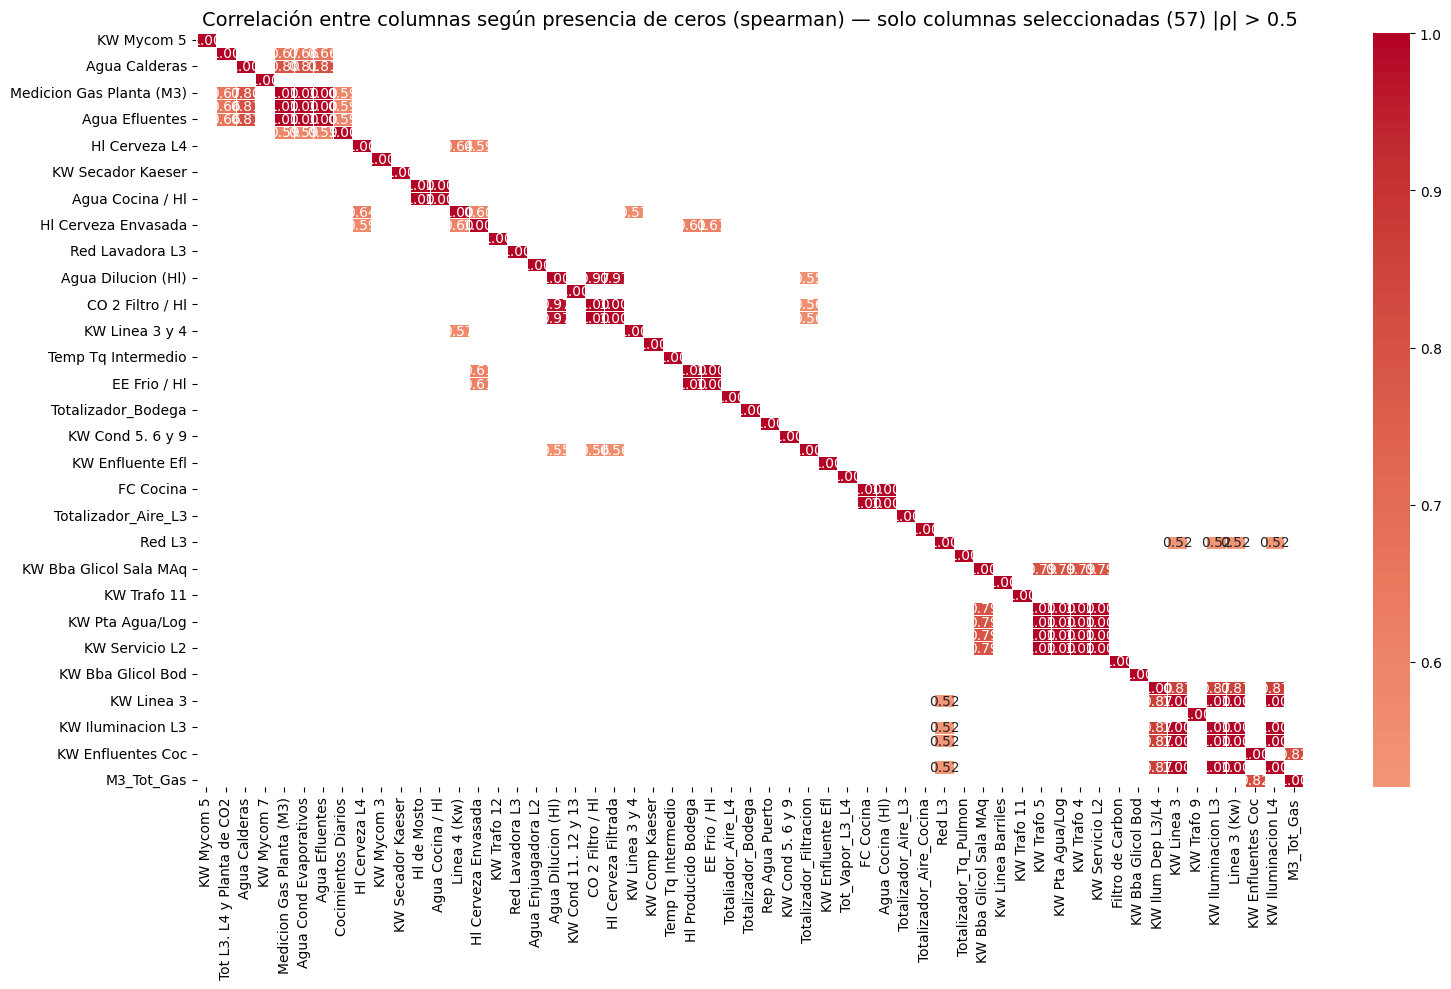

In [8]:
corr_zeros = matriz_correlacion_ceros(df, columnas=cols_ceros_array, metodo="spearman", umbral=0.5)


In [9]:
def separar_columnas_por_correlacion(corr_matrix, columnas, umbral=0.5):
    """
    Dada una matriz de correlaciones y una lista de columnas,
    devuelve dos listas:
      - columnas sin correlaciones altas (|ρ| < umbral)
      - columnas con correlaciones altas (|ρ| >= umbral)
    """
    cols_sin_corr = []
    cols_con_corr = []

    for col in columnas:
        # Obtener correlaciones absolutas con las demás (excluyendo consigo misma)
        correlaciones = corr_matrix.loc[col, columnas].drop(col).abs()
        # Ver si alguna supera el umbral
        if (correlaciones >= umbral).any():
            cols_con_corr.append(col)
        else:
            cols_sin_corr.append(col)

    return cols_sin_corr, cols_con_corr

# --- Uso ---
cols_sin_corr, cols_con_corr = separar_columnas_por_correlacion(
    corr_zeros,
    cols_ceros_array,
    umbral=0.5
)

print(f"🟢 Columnas SIN correlaciones altas: {len(cols_sin_corr)}")
print(f"🔴 Columnas CON correlaciones altas: {len(cols_con_corr)}")


🟢 Columnas SIN correlaciones altas: 24
🔴 Columnas CON correlaciones altas: 33


Antes de comenzar con la imputación, partiremos el dataset en train y test y analizaremos los outliers.

In [10]:
from sklearn.model_selection import train_test_split

# Separar variables independientes (X) y dependiente (y)
X = df.drop(columns=['Frio (Kw)'])
y = df['Frio (Kw)']

# Dividir en entrenamiento y prueba (70% / 30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,         # proporción del conjunto de prueba
    random_state=42,       # para reproducibilidad
    shuffle=True           # barajar los datos antes de dividir
)

print("✅ División completada:")
print(f"X_train: {X_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test:  {y_test.shape}")


✅ División completada:
X_train: (828, 104)
X_test:  (356, 104)
y_train: (828,)
y_test:  (356,)


In [11]:
# Asegurarse de usar solo columnas numéricas
X_train_num = X_train.select_dtypes(include=[np.number])

# Calcular z-score absoluto
z_scores = np.abs(stats.zscore(X_train_num, nan_policy='omit'))

# Convertir a DataFrame para facilitar análisis
z_scores_df = pd.DataFrame(z_scores, columns=X_train_num.columns, index=X_train_num.index)


umbral = 3.0

# Máscara booleana: True donde hay outliers
outliers_mask = (z_scores_df > umbral)

# Cuántos outliers tiene cada columna
outliers_por_col = outliers_mask.sum().sort_values(ascending=False)

print("🔹 Cantidad de outliers por columna:")
print(outliers_por_col[outliers_por_col > 0])




🔹 Cantidad de outliers por columna:
Tot L3. L4 y Planta de CO2    17
Agua Servicios (Hl)           14
Red Lavadora L3               12
FC CIP Bodega                 11
Agua Envasado (Hl)            10
KW Enfluentes Hidr             9
KW Laboratorio                 8
Red L3                         8
Kw Linea Barriles              8
Agua Efluentes                 8
Totalizador_Bodega             8
Agua Calderas                  8
Totalizador_Filtracion         7
CO 2 Filtro / Hl               7
Agua Enjuagadora L2            7
KW Servicio L2                 6
KW Pta Agua/Log                6
Agua Cocina / Hl               6
Bodega (Kw)                    6
Temp Tq Intermedio             5
Agua Dilucion (Hl)             5
ET Envasado (Mj)               5
Gas Planta (Mj)                5
KW Trafo 10                    5
KW Trafo 11                    5
Aire Elaboracion (m3)          5
KW Trafo 4                     5
Totalizador_Tq_Pulmon          5
Sala Maq (Kw)                  5
Agua Co

Ahora sí, a imputar.

In [12]:
from sklearn.impute import KNNImputer

# Redefinimos arreglos con X_train
cols_con_ceros = columnas_con_ceros(X_train)
cols_ceros_array = cols_con_ceros.index.to_list()

imputer_knn = KNNImputer(n_neighbors=20)

# Reemplazar ceros por NaN solo en las columnas que los tienen
X_train_temp = X_train.copy()
X_train_temp[cols_ceros_array] = X_train_temp[cols_ceros_array].replace(0, np.nan)

# Imputar con KNN
X_train_imputado = X_train.copy()
X_train_imputado[cols_ceros_array] = imputer_knn.fit_transform(X_train_temp[cols_ceros_array])

# Verificar
cols_con_ceros = columnas_con_ceros(X_train_imputado)
print(cols_con_ceros)


⚠️ Columnas con valores cero:
✅ No se encontraron columnas con valores cero.
Empty DataFrame
Columns: [columna, cantidad_ceros]
Index: []


FEATURE ENGINEERING

In [13]:
df["Frio (Kw)_movil_5"] = df["Frio (Kw)"].rolling(window=5, min_periods=1).mean()
df["finde"] = df["Dia_semana"].isin(["Sabado", "Domingo"]).astype(int)
print(df[['Frio (Kw)', 'Frio (Kw)_movil_5']])

      Frio (Kw)  Frio (Kw)_movil_5
0       23954.0       2.395400e+04
1       28268.0       2.611100e+04
2       24246.0       2.548933e+04
3       29885.0       2.658825e+04
4       24449.0       2.616040e+04
5       24435.0       2.625660e+04
6       33401.0       2.728320e+04
7       30921.0       2.861820e+04
8       27721.0       2.818540e+04
9       29046.0       2.910480e+04
10      35721.0       3.136200e+04
11      31017.0       3.088520e+04
12      34753.0       3.165160e+04
13      26648.0       3.143700e+04
14      27628.0       3.115340e+04
15      26595.0       2.932820e+04
16      30933.0       2.931140e+04
17      34890.0       2.933880e+04
18      33155.0       3.064020e+04
19      33436.0       3.180180e+04
20      38249.0       3.413260e+04
21      40886.0       3.612320e+04
22      33644.0       3.587400e+04
23      30355.0       3.531400e+04
24      36679.0       3.596260e+04
25      31448.0       3.460240e+04
26      33549.0       3.313500e+04
27      34214.0     

In [14]:
def agregar_ratios(df):
    """
    Agrega columnas de ratios energéticos entre áreas principales.
    Requiere que las columnas base estén en el DataFrame.
    """

    df = df.copy()

    # --- Ratios respecto a Planta ---
    df["ratio_SalaMaq_Planta"] = df["Sala Maq (Kw)"] / df["Planta (Kw)"]
    df["ratio_Servicios_Planta"] = df["Servicios (Kw)"] / df["Planta (Kw)"]
    df["ratio_Produccion_Planta"] = df["Produccion (Hl)"] / df["Planta (Kw)"]

    # --- Ratios respecto a Producción ---
    df["ratio_SalaMaq_Produccion"] = df["Sala Maq (Kw)"] / df["Produccion (Hl)"]
    df["ratio_Servicios_Produccion"] = df["Servicios (Kw)"] / df["Produccion (Hl)"]
    df["ratio_Planta_Produccion"] = df["Planta (Kw)"] / df["Produccion (Hl)"]
    df["ratio_Cocina_Produccion"] = df["Cocina (Kw)"] / df["Produccion (Hl)"]

    # --- Ratios específicos adicionales ---
    df["ratio_Cocina_SalaMaq"] = df["Cocina (Kw)"] / df["Sala Maq (Kw)"]
    df["ratio_Cocina_Servicios"] = df["Cocina (Kw)"] / df["Servicios (Kw)"]
    df["ratio_Servicios_SalaMaq"] = df["Servicios (Kw)"] / df["Sala Maq (Kw)"]

    # Evitar infinitos o NaN si alguna división tiene 0
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

    return df


# 🧪 Ejemplo de uso:
df = agregar_ratios(df)


Nos quedaremos con las 15 variables más correlacionadas con la target y haremos un PolynomialFeatures sobre ellas.

In [15]:
target = "Frio (Kw)" 

# --- 1️⃣ Calcular correlaciones ---
corr_spearman = df.corr(method="spearman", numeric_only=True)
corr_target = corr_spearman[target].drop(target).sort_values(ascending=False)

# 🔹 Seleccionar las 15 más correlacionadas (en valor absoluto)
top15 = corr_target.abs().sort_values(ascending=False).head(15)
top15 = corr_target.loc[top15.index]  # mantener signo original

print("🔝 Top 15 variables más correlacionadas con el target:")
print(top15)

🔝 Top 15 variables más correlacionadas con el target:
Frio (Kw)_movil_5             0.871598
Sala Maq (Kw)                 0.829147
Servicios (Kw)                0.825287
KW Gral Planta                0.798455
Planta (Kw)                   0.797649
Agua Planta (Hl)              0.754109
Tarifa_electrica              0.751552
Planta de agua (Hl)           0.749766
KW Trafo 10                   0.730659
Produccion (Hl)               0.726973
Totalizador Sistema Kaeser    0.723714
Aire Producido (M3)           0.723714
Kw Compresores Aire           0.723647
Aire (Kw)                     0.713423
Elaboracion (Kw)              0.703196
Name: Frio (Kw), dtype: float64


In [16]:
from sklearn.preprocessing import PolynomialFeatures

def generar_features_polinomicos(df, columnas_numericas, grado=2, incluir_bias=False):
    """
    Genera características polinómicas a partir de las columnas numéricas del DataFrame.

    Parámetros:
        df: DataFrame original.
        columnas_numericas: lista de columnas sobre las cuales generar los polinomios.
        grado: grado del polinomio (por defecto 2).
        incluir_bias: si True, incluye una columna de 1s.

    Retorna:
        DataFrame con las nuevas columnas polinómicas y las originales .
    """

    # Seleccionamos las columnas numéricas elegidas
    df_num = df[columnas_numericas]

    # Generamos las features polinómicas
    poly = PolynomialFeatures(degree=grado, include_bias=incluir_bias)
    arr_poly = poly.fit_transform(df_num)

    # Nombres de las nuevas columnas
    nombres_poly = poly.get_feature_names_out(columnas_numericas)

    # DataFrame con las columnas polinómicas
    df_poly = pd.DataFrame(arr_poly, columns=nombres_poly, index=df.index)

    # Si queremos mantener las originales, concatenamos
    # Evitamos duplicar columnas que ya existían (como las de grado 1)
    nuevas_columnas = [c for c in df_poly.columns if c not in df.columns]
    df_resultado = pd.concat([df, df_poly[nuevas_columnas]], axis=1)
    return df_resultado


# 🧪 Ejemplo de uso:
df = generar_features_polinomicos(df, top15.index.tolist(), grado=2)
print(df.shape)



(1184, 237)


Todas estas columnas que añadimos nos trajeron problemáticas de outliers y nans que debemos solucionar. Por ello, repetiremos lo utilizado previamente.

In [17]:
# Separar variables independientes (X) y dependiente (y)
X = df.drop(columns=['Frio (Kw)'])
y = df['Frio (Kw)']

# Dividir en entrenamiento y prueba (70% / 30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,         # proporción del conjunto de prueba
    random_state=42,       # para reproducibilidad
    shuffle=True           # barajar los datos antes de dividir
)

print("✅ División completada:")
print(f"X_train: {X_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test:  {y_test.shape}")

# Asegurarse de usar solo columnas numéricas
X_train_num = X_train.select_dtypes(include=[np.number])

# Calcular z-score absoluto
z_scores = np.abs(stats.zscore(X_train_num, nan_policy='omit'))

# Convertir a DataFrame para facilitar análisis
z_scores_df = pd.DataFrame(z_scores, columns=X_train_num.columns, index=X_train_num.index)


umbral = 3.0

# Máscara booleana: True donde hay outliers
outliers_mask = (z_scores_df > umbral)

# Cuántos outliers tiene cada columna
outliers_por_col = outliers_mask.sum().sort_values(ascending=False)

print("🔹 Cantidad de outliers por columna:")
print(outliers_por_col[outliers_por_col > 0])

# Redefinimos arreglos con X_train
cols_con_ceros = columnas_con_ceros(X_train)
cols_ceros_array = cols_con_ceros.index.to_list()

imputer_knn = KNNImputer(n_neighbors=20)

# Reemplazar ceros por NaN solo en las columnas que los tienen
X_train_temp = X_train.copy()
X_train_temp[cols_ceros_array] = X_train_temp[cols_ceros_array].replace(0, np.nan)

# Imputar con KNN
X_train_imputado = X_train.copy()
X_train_imputado[cols_ceros_array] = imputer_knn.fit_transform(X_train_temp[cols_ceros_array])

# Verificar
cols_con_ceros = columnas_con_ceros(X_train_imputado)
print(cols_con_ceros)


✅ División completada:
X_train: (828, 236)
X_test:  (356, 236)
y_train: (828,)
y_test:  (356,)
🔹 Cantidad de outliers por columna:
Frio (Kw)_movil_5 KW Gral Planta                  19
Frio (Kw)_movil_5 Planta (Kw)                     19
Frio (Kw)_movil_5 Produccion (Hl)                 18
Frio (Kw)_movil_5 Totalizador Sistema Kaeser      18
Frio (Kw)_movil_5 Tarifa_electrica                18
Frio (Kw)_movil_5 Planta de agua (Hl)             18
Frio (Kw)_movil_5 Agua Planta (Hl)                18
Frio (Kw)_movil_5 Servicios (Kw)                  18
Frio (Kw)_movil_5                                 18
Frio (Kw)_movil_5 Kw Compresores Aire             18
Frio (Kw)_movil_5 Elaboracion (Kw)                18
Frio (Kw)_movil_5 Aire (Kw)                       18
Frio (Kw)_movil_5 Aire Producido (M3)             18
Frio (Kw)_movil_5 KW Trafo 10                     17
Tot L3. L4 y Planta de CO2                        17
Agua Servicios (Hl)                               14
Red Lavadora L3      

Usamos .get_dummies para aplicar One-Hot a las variables categóricas

In [18]:
def aplicar_get_dummies(X_train, X_test):
    """
    Aplica pd.get_dummies a X_train y X_test garantizando que ambos 
    tengan las mismas columnas (alineadas correctamente).

    Retorna:
        X_train_dum, X_test_dum
    """
    # Concatenamos para aprender todas las categorías posibles
    df_combinado = pd.concat([X_train, X_test], axis=0)

    # Generamos las variables dummies
    df_dummies = pd.get_dummies(df_combinado, drop_first=True)

    # Separamos nuevamente en train y test
    X_train_dum = df_dummies.iloc[:len(X_train), :].copy()
    X_test_dum = df_dummies.iloc[len(X_train):, :].copy()

    return X_train_dum, X_test_dum

X_train_dum, X_test_dum = aplicar_get_dummies(X_train, X_test)

print(X_train_dum.shape, X_test_dum.shape)


(828, 243) (356, 243)


Como nos quedaron múltiples columnas, veamos con LASSO y Feature Importances qué podemos sacarnos de encima.

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

def importancia_variables_rf(X_train, y_train, n_estimators=300, max_depth=None, random_state=42):
    """
    Entrena un Random Forest y devuelve un DataFrame con la importancia de variables.
    """
    # ⚖️ Escalado no es obligatorio para RF, pero puede ayudar si las magnitudes son muy distintas
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_train)

    # 🌲 Entrenamos el modelo
    rf = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        random_state=random_state,
        n_jobs=-1
    )
    rf.fit(X_scaled, y_train)

    # 📊 Importancia de las variables
    importancias = pd.DataFrame({
        'variable': X_train.columns,
        'importancia': rf.feature_importances_
    }).sort_values(by='importancia', ascending=False)

    # 🧩 Mostramos el top 15
    print("\nTop 15 variables más importantes:")
    display(importancias.head(15))

    return rf, importancias


In [20]:
modelo_rf, importancia_df = importancia_variables_rf(X_train_dum, y_train)


Top 15 variables más importantes:


,variable,importancia
68,Resto Serv (Kw),0.144909
114,Frio (Kw)_movil_5^2,0.111832
102,Frio (Kw)_movil_5,0.105126
123,Frio (Kw)_movil_5 Produccion (Hl),0.080472
120,Frio (Kw)_movil_5 Tarifa_electrica,0.078868
128,Frio (Kw)_movil_5 Elaboracion (Kw),0.061171
16,Pta Agua / Eflu (Kw),0.046202
96,Hl Cerveza L4,0.041879
115,Frio (Kw)_movil_5 Sala Maq (Kw),0.029028
117,Frio (Kw)_movil_5 KW Gral Planta,0.023714


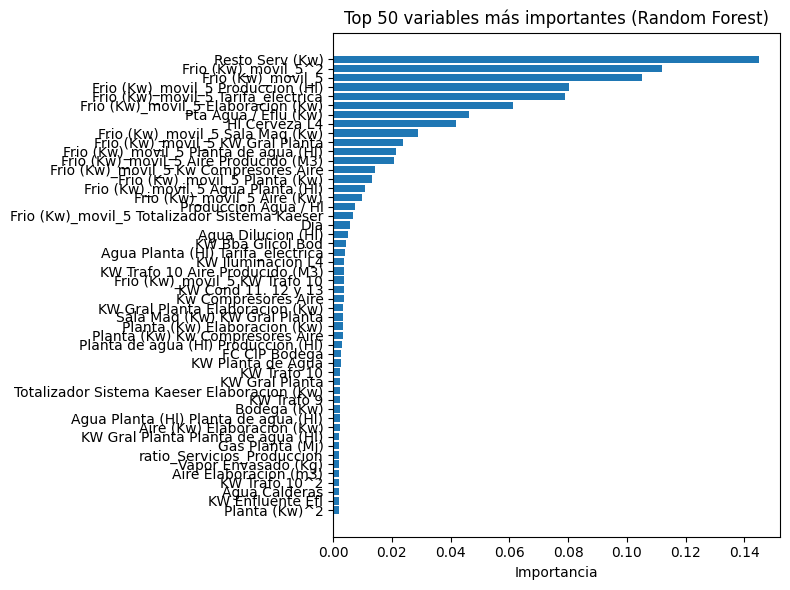

In [21]:
def graficar_importancia(importancias, top_n=15):
    top = importancias.head(top_n).sort_values(by='importancia')
    plt.figure(figsize=(8, 6))
    plt.barh(top['variable'], top['importancia'])
    plt.title(f'Top {top_n} variables más importantes (Random Forest)')
    plt.xlabel('Importancia')
    plt.tight_layout()
    plt.show()

# 🪄 Ejemplo:
graficar_importancia(importancia_df, top_n=50)


In [22]:
top_50_vars = importancia_df.head(50)['variable'].tolist()

X_train_top50 = X_train_dum[top_50_vars].copy()

print(f"✅ Quedaste con {X_train_top50.shape[1]} variables importantes.")
X_train_top50.head()


✅ Quedaste con 50 variables importantes.


,Resto Serv (Kw),Frio (Kw)_movil_5^2,Frio (Kw)_movil_5,Frio (Kw)_movil_5 Produccion (Hl),Frio (Kw)_movil_5 Tarifa_electrica,Frio (Kw)_movil_5 Elaboracion (Kw),Pta Agua / Eflu (Kw),Hl Cerveza L4,Frio (Kw)_movil_5 Sala Maq (Kw),Frio (Kw)_movil_5 KW Gral Planta,...,Aire (Kw) Elaboracion (Kw),KW Gral Planta Planta de agua (Hl),Gas Planta (Mj),ratio_Servicios_Produccion,Vapor Envasado (Kg),Aire Elaboracion (m3),KW Trafo 10^2,Agua Calderas,KW Enfluente Efl,Planta (Kw)^2
593,11690.0,4.492914e+09,67029.2,3.494634e+09,3.002204e+13,1.075752e+09,3098.0,22072.0,3.328134e+09,1.745065e+10,...,197819974.0,1.931695e+10,1.049792e+06,1.506828,156608.62,49673.70,549949401.0,81.4,1732.0,1.609809e+10
732,15474.0,5.418668e+09,73611.6,5.164354e+09,4.933068e+13,1.461043e+09,3192.0,21552.0,6.322353e+09,2.870411e+10,...,357899136.0,4.572475e+10,1.242218e+06,1.669888,222299.82,59918.04,669256900.0,133.6,1862.0,3.591344e+10
829,11992.0,2.175700e+09,46644.4,1.695151e+09,2.298517e+13,7.350225e+08,2454.0,20872.0,2.645111e+09,1.301006e+10,...,188465680.0,1.916214e+10,9.347682e+05,2.150955,210639.96,45482.44,557432100.0,100.4,1664.0,1.850661e+10
552,7090.0,6.171250e+08,24842.0,4.835744e+08,5.795509e+12,1.708633e+08,866.0,17984.0,5.140307e+08,3.400075e+09,...,63029992.0,4.785617e+09,7.851871e+05,1.975650,114524.40,48634.62,182412036.0,0.0,0.0,4.223978e+09
872,7044.0,1.016768e+09,31886.8,4.126790e+08,7.483654e+12,2.607065e+08,2106.0,4236.0,1.084789e+09,4.264158e+09,...,65522464.0,3.371256e+09,3.496560e+05,3.626796,36682.88,48982.60,283585600.0,86.8,1562.0,4.126516e+09


In [23]:
from sklearn.linear_model import Lasso

# Supongamos que tu target es y_train
# Escalamos los datos porque Lasso es sensible a la escala
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_top50)

# Definimos el modelo Lasso
# Ajusta alpha según la regularización que quieras
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_train)

# Obtenemos coeficientes
coef = pd.Series(lasso.coef_, index=X_train_top50.columns)

# Mostramos importancia absoluta ordenada
importancia = coef.abs().sort_values(ascending=False)
print(importancia)

# Opcional: filtrar solo variables con coef != 0
variables_relevantes = coef[coef != 0].sort_values(key=abs, ascending=False)
print(variables_relevantes)


Frio (Kw)_movil_5 KW Gral Planta                2.277903e+06
Frio (Kw)_movil_5 Planta de agua (Hl)           1.978683e+06
Frio (Kw)_movil_5 Aire Producido (M3)           1.656356e+06
Frio (Kw)_movil_5^2                             9.931748e+05
Frio (Kw)_movil_5 Produccion (Hl)               8.866825e+05
Frio (Kw)_movil_5 Agua Planta (Hl)              8.790146e+05
Frio (Kw)_movil_5 Elaboracion (Kw)              8.315804e+05
Frio (Kw)_movil_5 Aire (Kw)                     6.937874e+05
Planta (Kw)^2                                   6.789194e+05
Frio (Kw)_movil_5 KW Trafo 10                   5.613324e+05
KW Trafo 10 Aire Producido (M3)                 5.475760e+05
Totalizador Sistema Kaeser Elaboracion (Kw)     5.466818e+05
Frio (Kw)_movil_5 Tarifa_electrica              5.217879e+05
Frio (Kw)_movil_5                               5.042411e+05
KW Gral Planta Elaboracion (Kw)                 4.772731e+05
Planta (Kw) Kw Compresores Aire                 4.740857e+05
KW Trafo 10^2           

c:\Users\franc\Desktop\MostoElMostro\MostoElMostro\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.466e+12, tolerance: 1.327e+10
  model = cd_fast.enet_coordinate_descent(


c:\Users\franc\Desktop\MostoElMostro\MostoElMostro\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.466e+12, tolerance: 1.327e+10
  model = cd_fast.enet_coordinate_descent(


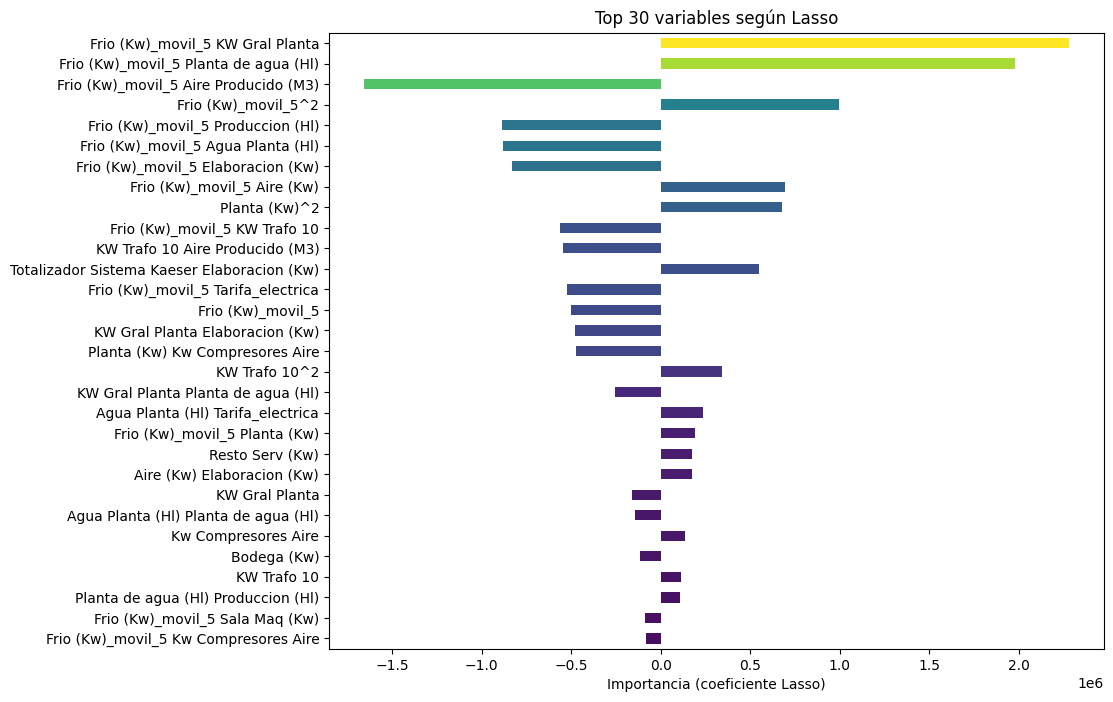

In [24]:
# Escalamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_top50)

# Ajustamos Lasso
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_train)

# Coeficientes como Series
coef = pd.Series(lasso.coef_, index=X_train_top50.columns)

# Tomamos las 30 variables con mayor valor absoluto
top30 = coef.abs().sort_values(ascending=False).head(30)

# Para gráfico, conservamos los signos originales
top30_signed = coef[top30.index].sort_values(key=abs, ascending=True)

# Gráfico de barras horizontal
plt.figure(figsize=(10,8))
top30_signed.plot(kind='barh', color=plt.cm.viridis(np.abs(top30_signed) / np.abs(top30_signed).max()))
plt.xlabel('Importancia (coeficiente Lasso)')
plt.title('Top 30 variables según Lasso')
plt.show()


In [25]:
# Tomamos los nombres de las 30 variables top según Lasso
top30_vars = top30_signed.index.tolist()

# Filtramos X_train_top50 para quedarnos solo con estas 30 variables
X_train_top30 = X_train_top50[top30_vars].copy()

print(f"✅ Quedaste con {X_train_top30.shape[1]} variables importantes")
X_train_top30.head()
print(X_train_top30.shape)


✅ Quedaste con 30 variables importantes
(828, 30)


Aparenta tener bastante sentido quedarnos con este conjunto de variables para trabajar. No dejan de ser productos entre el promedio móvil de la variable de Frío y las features con mayor correlación a la misma.